# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [19]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

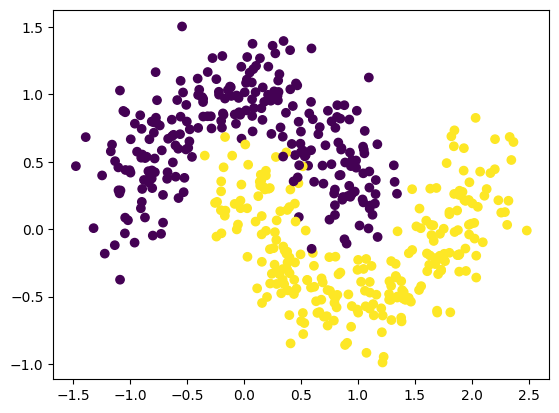

In [20]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=10, solver='saga', max_iter=500) # add some params
svm = SVC(kernel='linear', C=5) # here too


In [22]:
def plot_svc_decision_function(model, points, labels, ax=None, plot_support=True):
    """Plot the decision function for our SVM class"""
    plt.scatter(points[:, 0], points[:, 1], c=labels)
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.predict(xy).reshape(X.shape)
    # plot decision boundary and margins
    CS = ax.contourf(X, Y, P, origin='lower', alpha=0.1)
    plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Test accuracy:  0.86


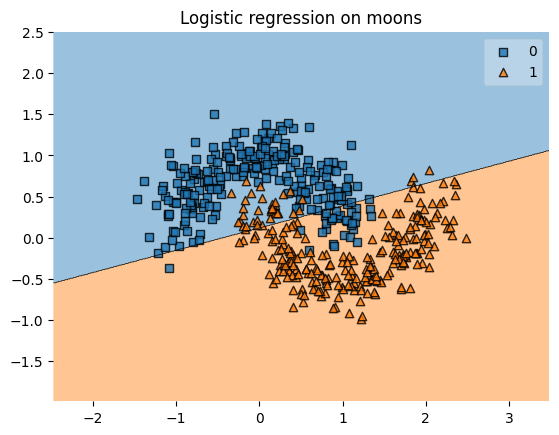

In [23]:
lr.fit(moons_points, moons_labels)
pred_lr = lr.predict(moons_points)
print("Test accuracy: ", accuracy_score(moons_labels, pred_lr))
plot_decision_regions(moons_points, moons_labels, clf=lr)
plt.title('Logistic regression on moons')
plt.show()

Test accuracy:  0.862


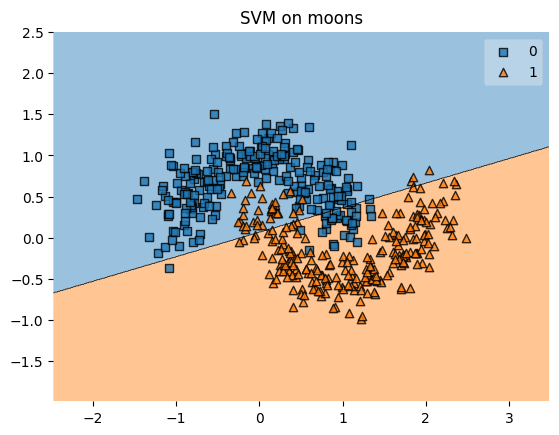

In [24]:
svm.fit(moons_points, moons_labels)
pred_svm = svm.predict(moons_points)
print("Test accuracy: ", accuracy_score(moons_labels, pred_svm))
plot_decision_regions(moons_points, moons_labels, clf=svm)
plt.title('SVM on moons')
plt.show()

Точность получилась одинаковая. Поподбирав параметры остановимся на тех, которые выдавали наибольший score. Но данные логистическая регрессия такие точно плохо разделяет, а вот с svm можно поработать, выбрав другое ядро

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Качество классификации менялось достаточно сильно при смене ядра и его гиперпараметров. Рассмотри поподробнее:
1) полиномиальное ядро дает наилучший результат при degree=5, причем решающая граница тут меняется интресно. Она не плавно становится лучше или хуже а скачками. То есть при степени = 1 результат был лучше чем при степени = 2, но потом результат стал улучшаться и достиг пика при степени = 7, а затем резко упал и граница стала очень странно выглядеть и вообще не соответствовать выборке.
2) rbf ядро при изменении гиперпараметров плавно становилось лучше. То есть для совсем маленьких гамма был очень маленький score и граница довольно плохо разделяла выборку, но чем больше становилась гамма, тем лучше разделялась выборка. И уже при гамма = 10000 видно, что модель переобучилась, поэтому здесь кажется лучше всего остановится на gamma = 0.3 или выбрать gamma='scale', потому что так будет для каждой выборки лучше подбираться
3) sigmoid ядро как будто бы совсем не подходит для нашей выборки, потому что при изменении гиперпараметра решающие границы становились хуже и не соответствовали выборке, поэтому лучший результат тут получился при gamma=0.02. Кажется что если продолжить менять гиперпараметр, то вряд ли получится подобрать такой, который хорошо бы подошел к нашей выборке

polynomial kernel

Test accuracy:  0.862


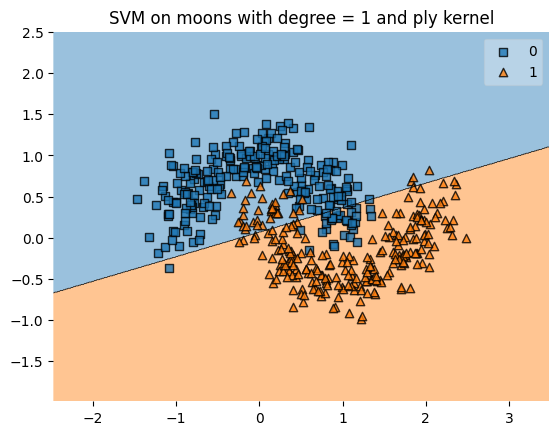

Test accuracy:  0.746


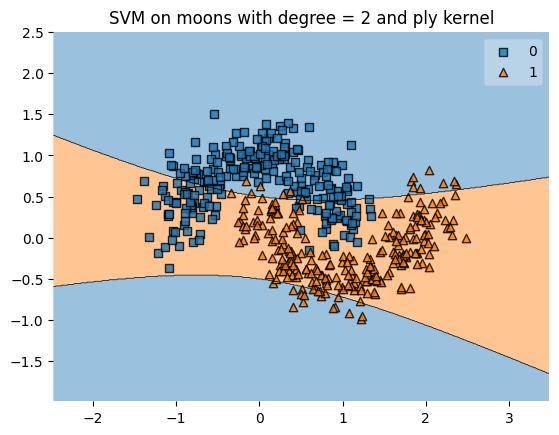

Test accuracy:  0.898


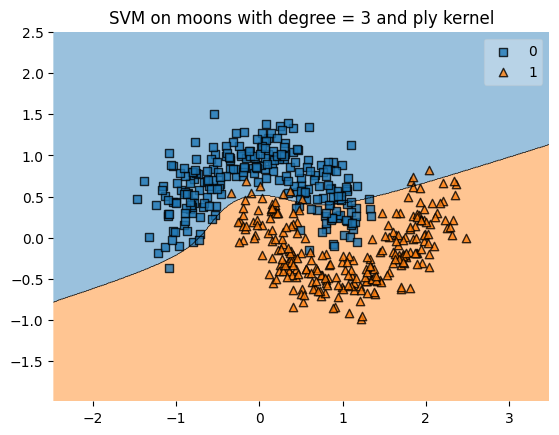

Test accuracy:  0.888


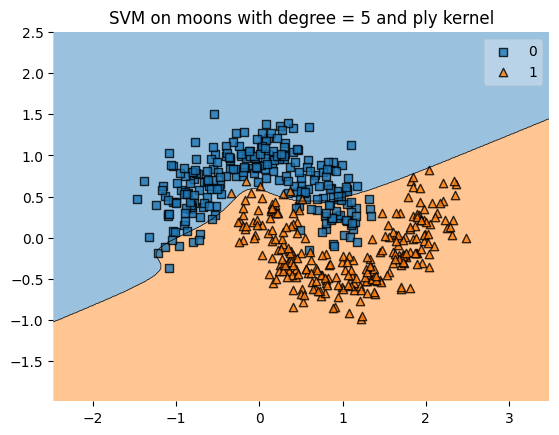

Test accuracy:  0.896


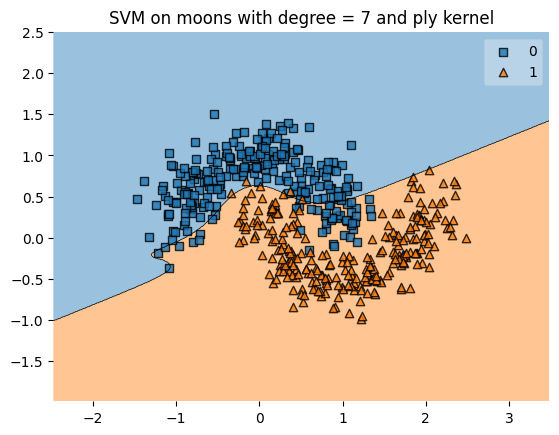

Test accuracy:  0.722


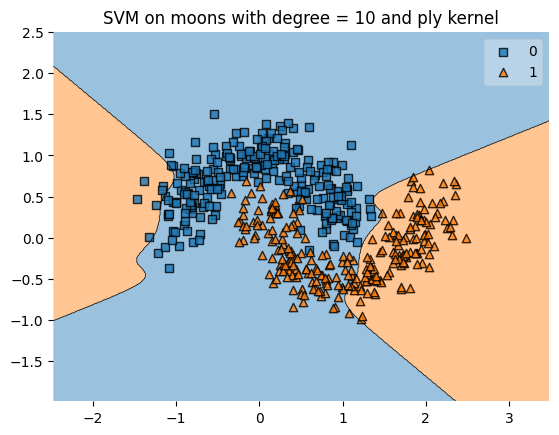

Test accuracy:  0.7


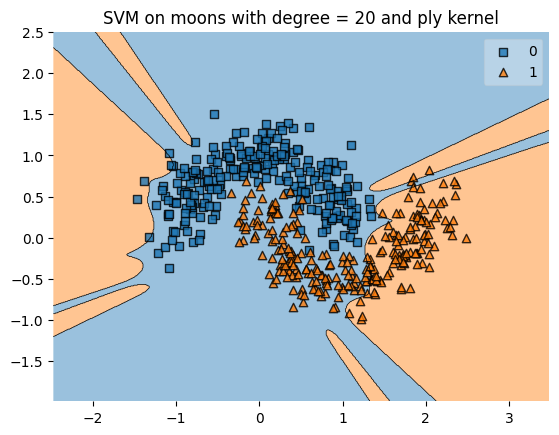

In [25]:
degree = [1, 2, 3, 5, 7, 10, 20]

for deg in degree:
    svm = SVC(kernel='poly', C=5, degree=deg)
    svm.fit(moons_points, moons_labels)
    pred_svm = svm.predict(moons_points)
    print("Test accuracy: ", accuracy_score(moons_labels, pred_svm))
    plot_decision_regions(moons_points, moons_labels, clf=svm)
    plt.title('SVM on moons with degree = {} and poly kernel'.format(deg))
    plt.show()
    # plot_svc_decision_function(svm, moons_points, moons_labels)
    # plt.title('SVM on moons')
    # plt.show()

RBF kernel

Test accuracy:  0.98


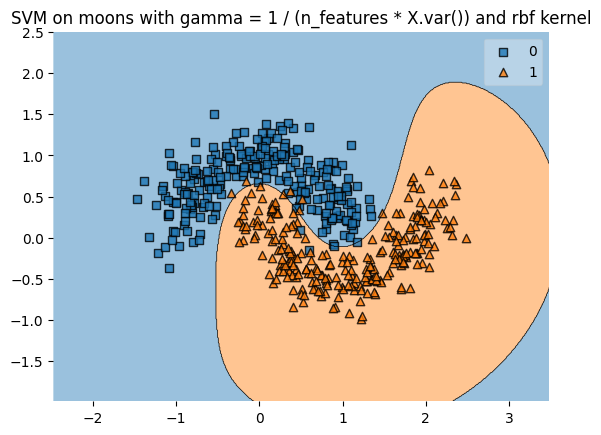

In [26]:
svm = SVC(kernel='rbf', C=5, gamma='scale')
svm.fit(moons_points, moons_labels)
pred_svm = svm.predict(moons_points)
print("Test accuracy: ", accuracy_score(moons_labels, pred_svm))
plot_decision_regions(moons_points, moons_labels, clf=svm)
plt.title('SVM on moons with gamma = 1 / (n_features * X.var()) and rbf kernel')
plt.show()
# plot_svc_decision_function(svm, moons_points, moons_labels)
# plt.title('SVM on moons')
# plt.show()

Test accuracy:  0.974


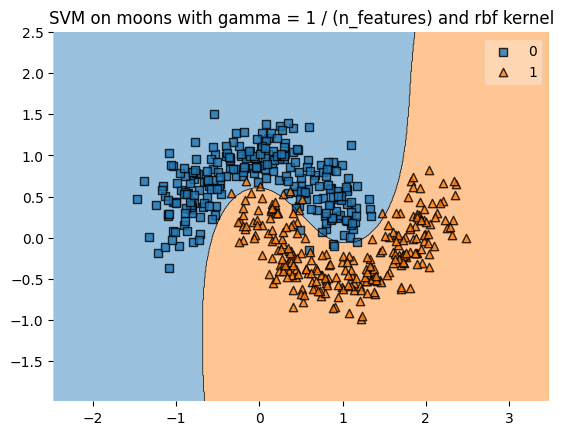

In [27]:
svm = SVC(kernel='rbf', C=5, gamma='auto')
svm.fit(moons_points, moons_labels)
pred_svm = svm.predict(moons_points)
print("Test accuracy: ", accuracy_score(moons_labels, pred_svm))
plot_decision_regions(moons_points, moons_labels, clf=svm)
plt.title('SVM on moons with gamma = 1 / (n_features) and rbf kernel')
plt.show()
# plot_svc_decision_function(svm, moons_points, moons_labels)
# plt.title('SVM on moons')
# plt.show()

Test accuracy:  0.794


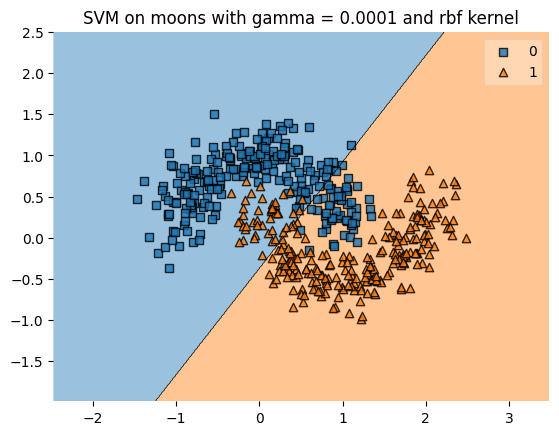

Test accuracy:  0.83


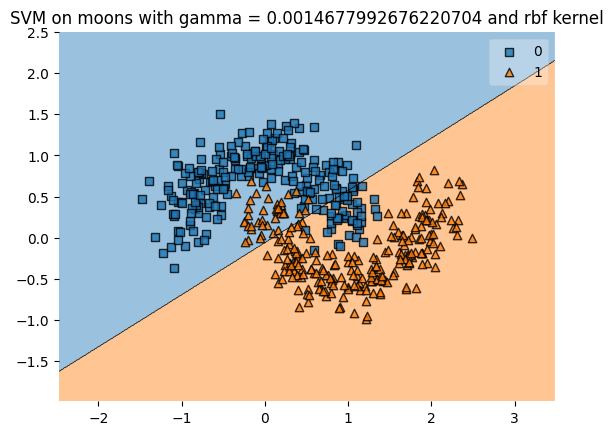

Test accuracy:  0.864


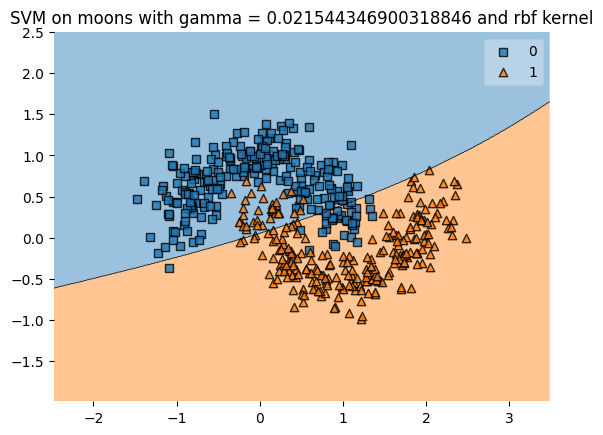

Test accuracy:  0.97


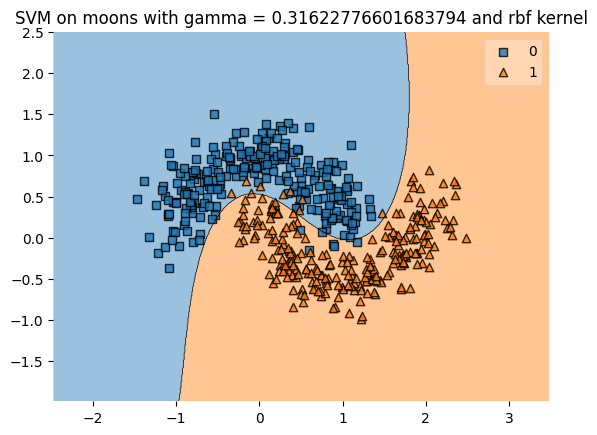

Test accuracy:  0.986


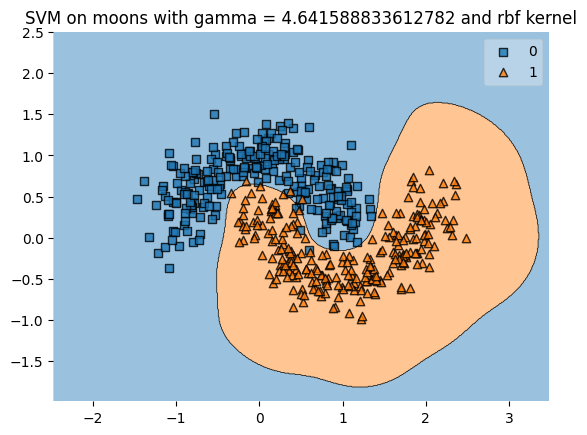

Test accuracy:  0.994


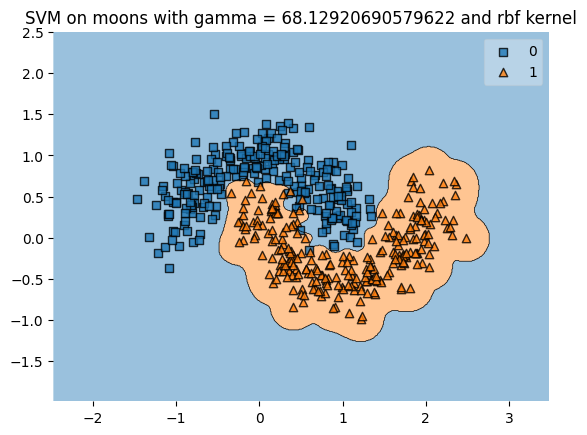

Test accuracy:  1.0


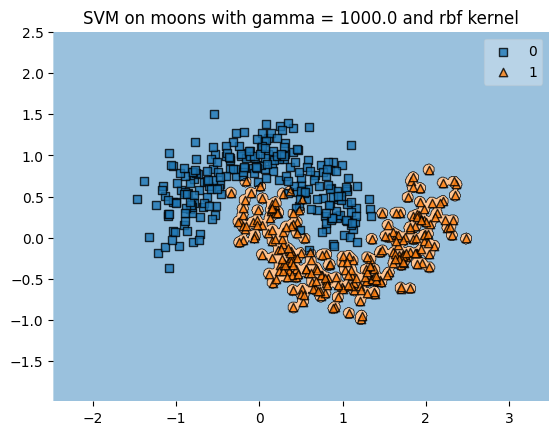

In [28]:
gamma = np.logspace(-4, 3, 7)

for g in gamma:
    svm = SVC(kernel='rbf', C=5, gamma=g)
    svm.fit(moons_points, moons_labels)
    pred_svm = svm.predict(moons_points)
    print("Test accuracy: ", accuracy_score(moons_labels, pred_svm))
    plot_decision_regions(moons_points, moons_labels, clf=svm)
    plt.title('SVM on moons with gamma = {} and rbf kernel'.format(g))
    plt.show()
    # plot_svc_decision_function(svm, moons_points, moons_labels)
    # plt.title('SVM on moons')
    # plt.show()

sigmoid kernel

Test accuracy:  0.794


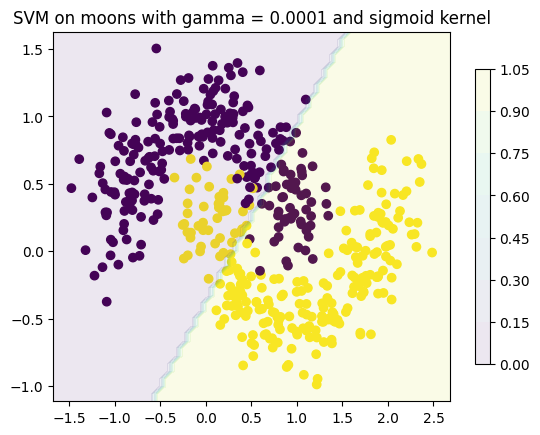

Test accuracy:  0.822


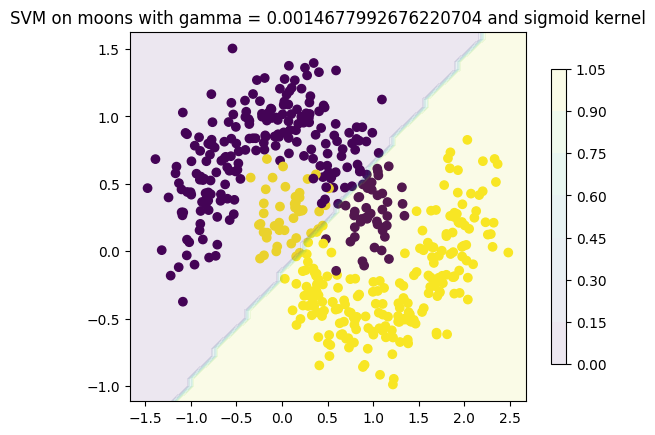

Test accuracy:  0.856


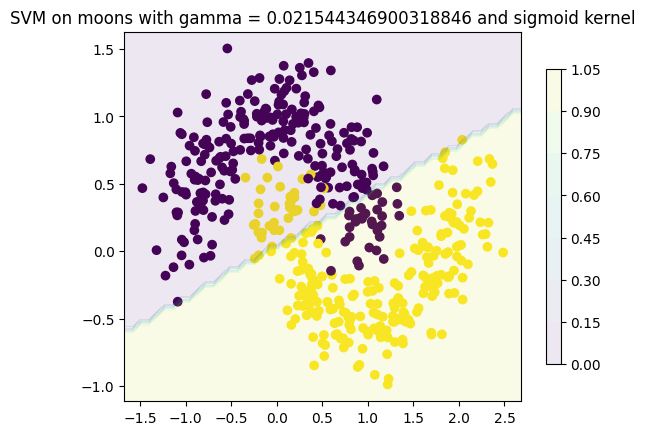

Test accuracy:  0.692


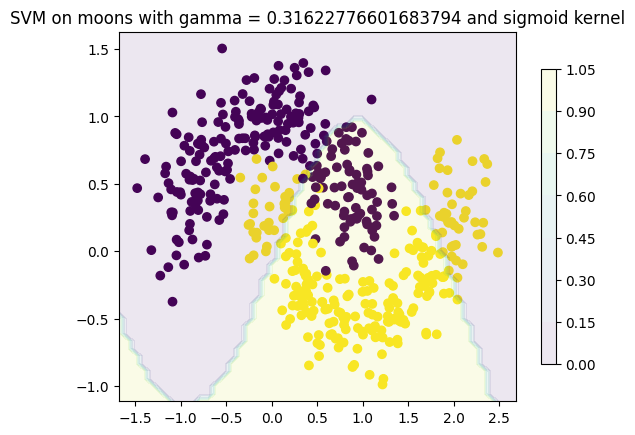

Test accuracy:  0.594


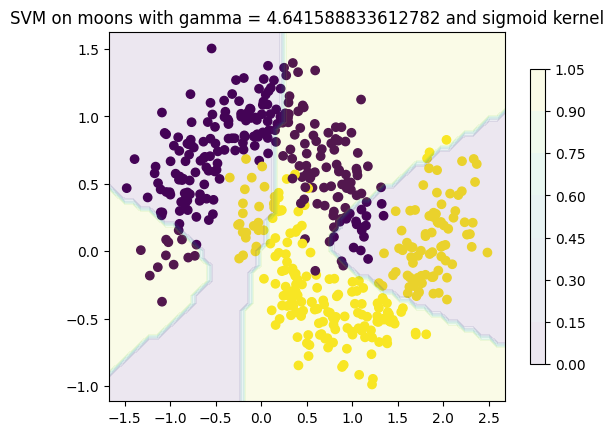

Test accuracy:  0.658


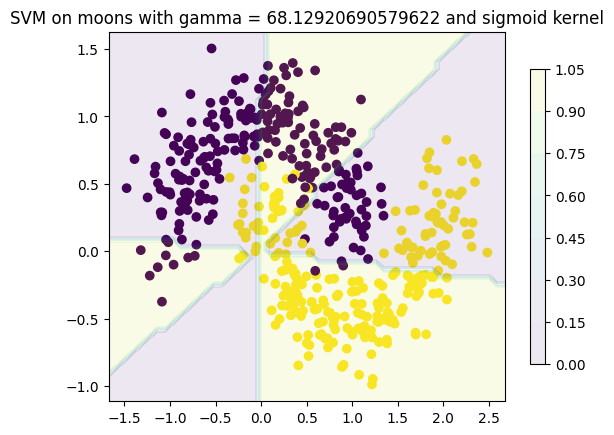

Test accuracy:  0.6


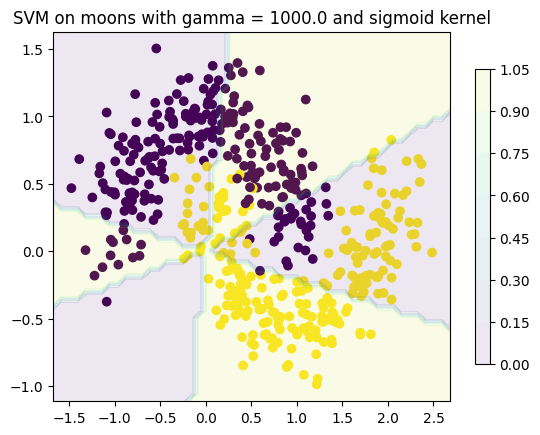

In [29]:
gamma = np.logspace(-4, 3, 7)

for g in gamma:
    svm = SVC(kernel='sigmoid', C=5, gamma=g)
    svm.fit(moons_points, moons_labels)
    pred_svm = svm.predict(moons_points)
    print("Test accuracy: ", accuracy_score(moons_labels, pred_svm))
    # plot_decision_regions(moons_points, moons_labels, clf=svm)
    # plt.title('SVM on moons with gamma = {} and sigmoid kernel'.format(g))
    # plt.show()
    plot_svc_decision_function(svm, moons_points, moons_labels)
    plt.title('SVM on moons with gamma = {} and sigmoid kernel'.format(g))
    plt.show()

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Используя предобработанную выборку, логистическая регрессия показала реально хороший результат на равне с svm. Качество и решающие границы внешне очень похожи на полиномиальное ядро, но здесь даже лучше получился score=0.974 при degree=3. А в полиномиальном ядре степень была = 7. Но в целом это очень круто, что с помощью преобразования признаков в логистической регрессии можно добится таких же результатов как и в svm.

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
def plot_lr_decision_function(model, points, labels, deg, ax=None):
    """Plot the decision function for our SVM class"""
    plt.scatter(points[:, 0], points[:, 1], c=labels)
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    xy_p = PolynomialFeatures(deg).fit_transform(xy)
    P = model.predict(xy_p).reshape(X.shape)
    # plot decision boundary and margins
    CS = ax.contourf(X, Y, P, origin='lower', alpha=0.1)
    plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Test accuracy:  0.86


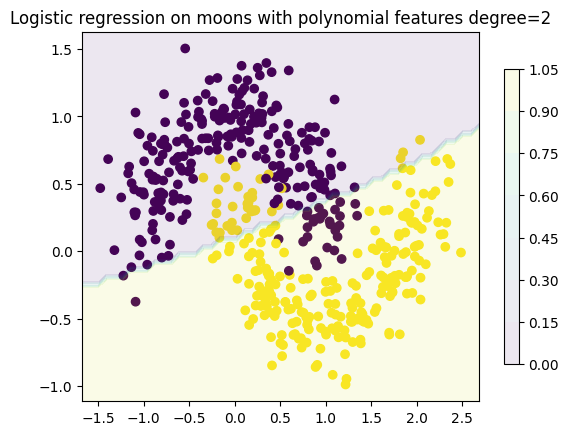

/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy:  0.974


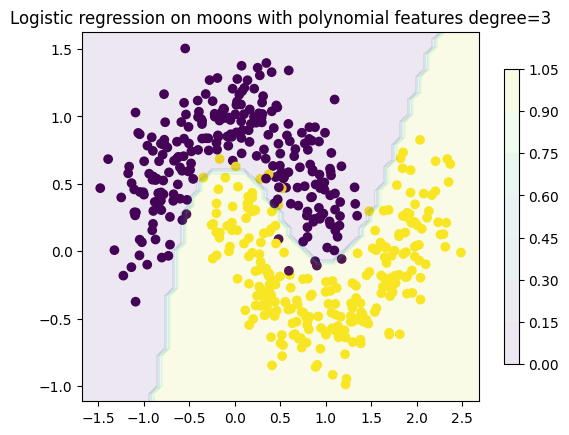

/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy:  0.952


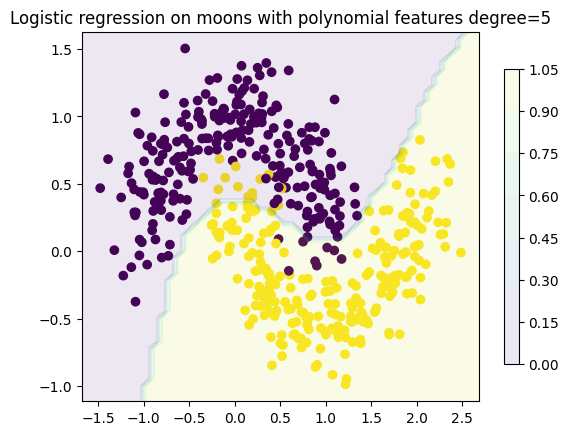

/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy:  0.792


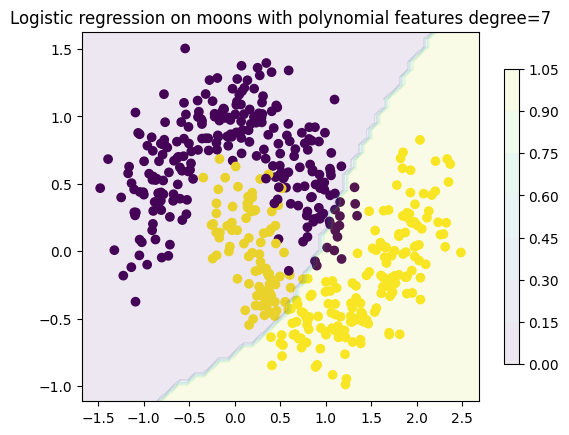

/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy:  0.684


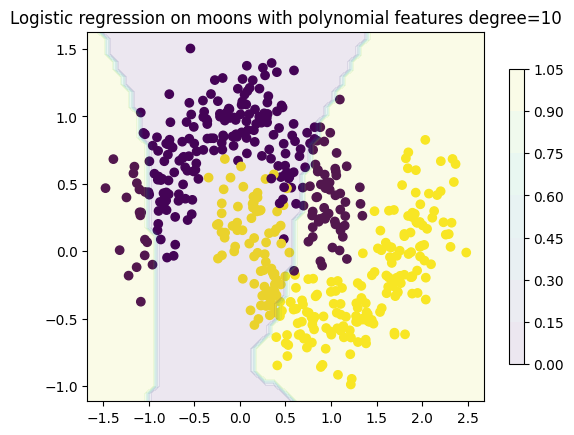

/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy:  0.628


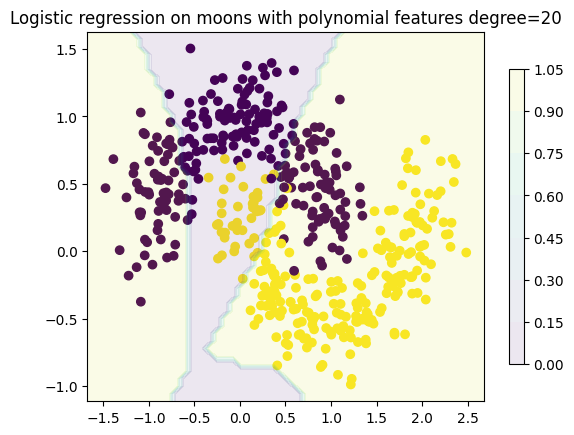

In [32]:
degree = [2, 3, 5, 7, 10, 20]
lr = LogisticRegression(C=10, solver='saga', max_iter=500)

for deg in degree:
    poly_f = PolynomialFeatures(degree=deg)
    new_points = poly_f.fit_transform(moons_points, moons_labels)
    lr.fit(new_points, moons_labels)
    pred_lr = lr.predict(new_points)
    print("Test accuracy: ", accuracy_score(moons_labels, pred_lr))
    plot_lr_decision_function(lr, moons_points, moons_labels, deg)
    plt.title('Logistic regression on moons with polynomial features degree={}'.format(deg))
    plt.show()
    

BEST DEGREE = 3

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

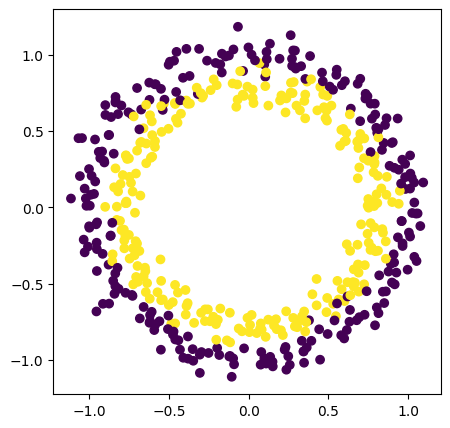

In [33]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

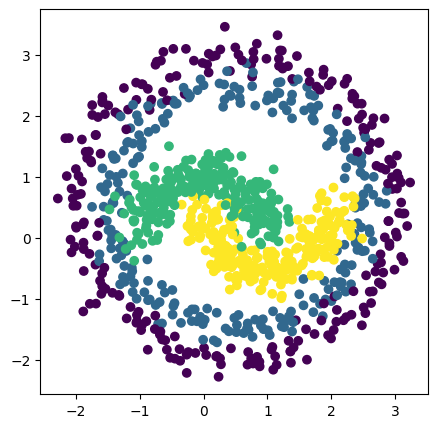

In [34]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Logistic regression  
Я выбрала степень равную 3, потому что он показала лучший score на предыдущей выборке. Здесь также у нас получился достаточной высокий score = 0.911, что говорит о том, что выбор был сделан правильный

/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy:  0.911


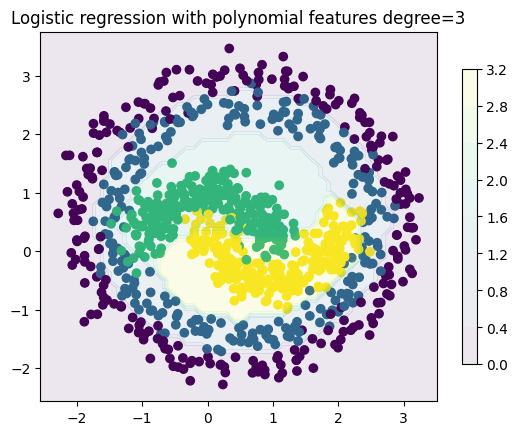

In [35]:
lr = LogisticRegression(C=10, solver='saga', max_iter=500)

poly_f = PolynomialFeatures(degree=3)

new_points = poly_f.fit_transform(points, labels)
lr.fit(new_points, labels)
pred_lr = lr.predict(new_points)
print("Test accuracy: ", accuracy_score(labels, pred_lr))
plot_lr_decision_function(lr, points, labels, 3)
plt.title('Logistic regression with polynomial features degree=3')
plt.show()

SVM.  
Лучший результат показало ядро rbf (потому что оно лучше всего приспосабливается ко всем условиям) с параметрами gamma = 'scale'. Результат получился чуть лучше, чем в логистической регрессии на 0.03, но опять же две модели оказались очень близки по результатам, значит мы подобрали правильные гиперпараметры. Но с svm работать проще, потому что не нужно делать предварительную обработку и преобразование данных.

Test accuracy:  0.934


/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


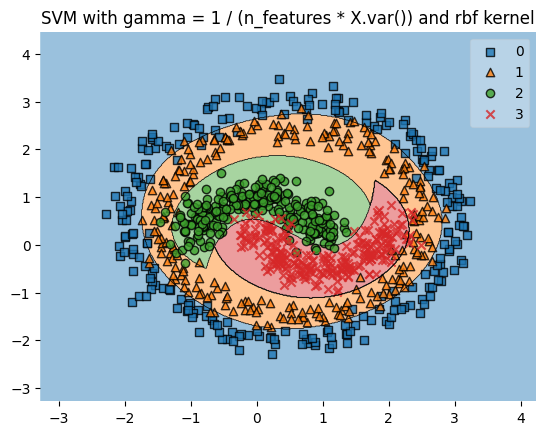

In [36]:
svm = SVC(kernel='rbf', C=5, gamma='scale')
svm.fit(points, labels)
pred_svm = svm.predict(points)
print("Test accuracy: ", accuracy_score(labels, pred_svm))
plot_decision_regions(points, labels, clf=svm)
plt.title('SVM with gamma = 1 / (n_features * X.var()) and rbf kernel')
plt.show()
# plot_svc_decision_function(svm, moons_points, moons_labels)
# plt.title('SVM on moons')
# plt.show()